<a href="https://colab.research.google.com/github/Beatrice26/DeepLearning/blob/main/Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Networks**

# **Convolution**
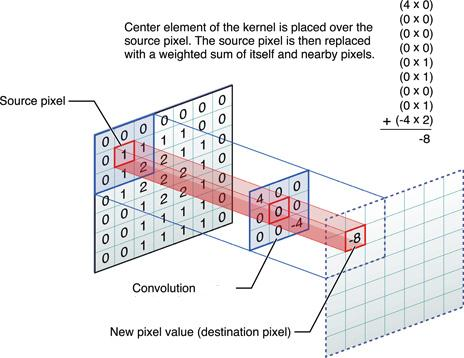

## **The Convolutional Layer**

* Le convoluzioni operano su tensori 3D, chiamati feature map (mappe di caratteristiche), con due assi spaziali (altezza e larghezza) e un asse di profondità (detto anche asse dei canali).

* Per un'immagine RGB, la dimensione dell'asse di profondità è 3, poiché l'immagine ha tre canali di colore: rosso, verde e blu.

* Per un'immagine in bianco e nero, come le cifre del dataset MNIST, la profondità è 1 (livelli di grigio).

* L'operazione di convoluzione estrae porzioni dal suo feature map di input e applica la stessa trasformazione a tutte queste porzioni, producendo una feature map di output.

* Questa feature map di output è ancora un tensore 3D: ha una larghezza e un'altezza.
  * La sua profondità può essere arbitraria, perché la profondità di output è un parametro del livello, e i diversi canali in quell'asse di profondità non rappresentano più colori specifici come nell'input RGB; piuttosto, rappresentano filtri. I filtri codificano aspetti specifici dei dati in input.











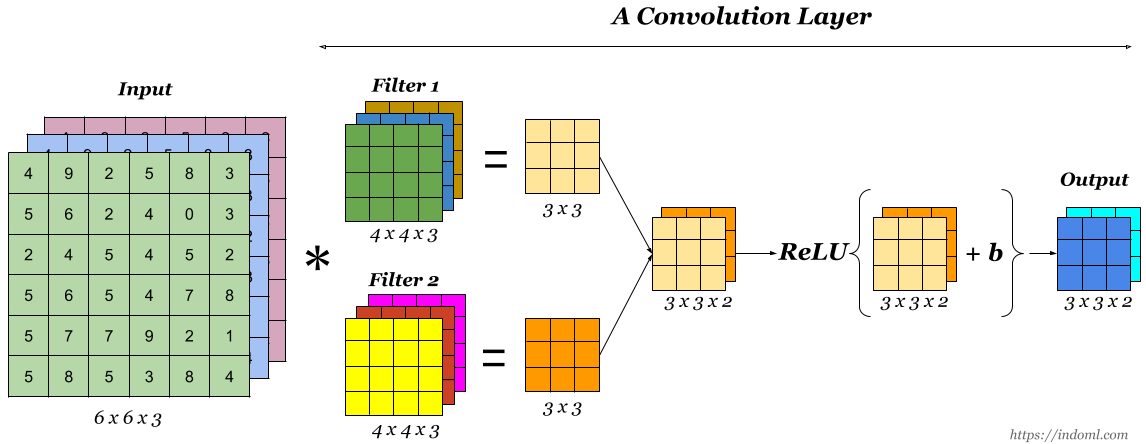



---



* Questa feature map di output è ancora un tensore 3D: ha una larghezza e un'altezza.
  * La sua profondità può essere arbitraria, poiché la profondità di output è un parametro del livello. I diversi canali in quell'asse di profondità non rappresentano più colori specifici come nell'input RGB; piuttosto, rappresentano filtri. I filtri codificano aspetti specifici dei dati in input.

  * La larghezza e l'altezza dell'output possono differire dalla larghezza e dall'altezza dell'input.
  
    * Possono differire per due motivi:
      * Effetti ai bordi, che si possono contrastare aggiungendo padding (riempimento) alla feature map di input.
      * L'uso dello stride, che controlla come il filtro viene applicato al volume di input.



* Il **padding** consiste nell'aggiungere un numero appropriato di righe e colonne su ciascun lato della feature map di input

  * Nei livelli Conv2D, il padding è configurabile tramite l'argomento padding, che può assumere due valori:

     * "valid", che significa senza padding (verranno utilizzate solo le posizioni valide della finestra),
     * "same", che significa "aggiungi padding in modo da ottenere un output con la stessa larghezza e altezza dell'input."
Di default, l'argomento padding è impostato su "valid".

Quindi, per calcolare larghezza e altezza dell'output possiamo usare questa formula:



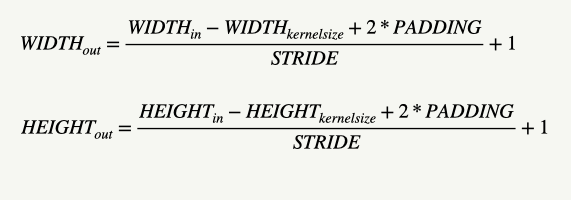

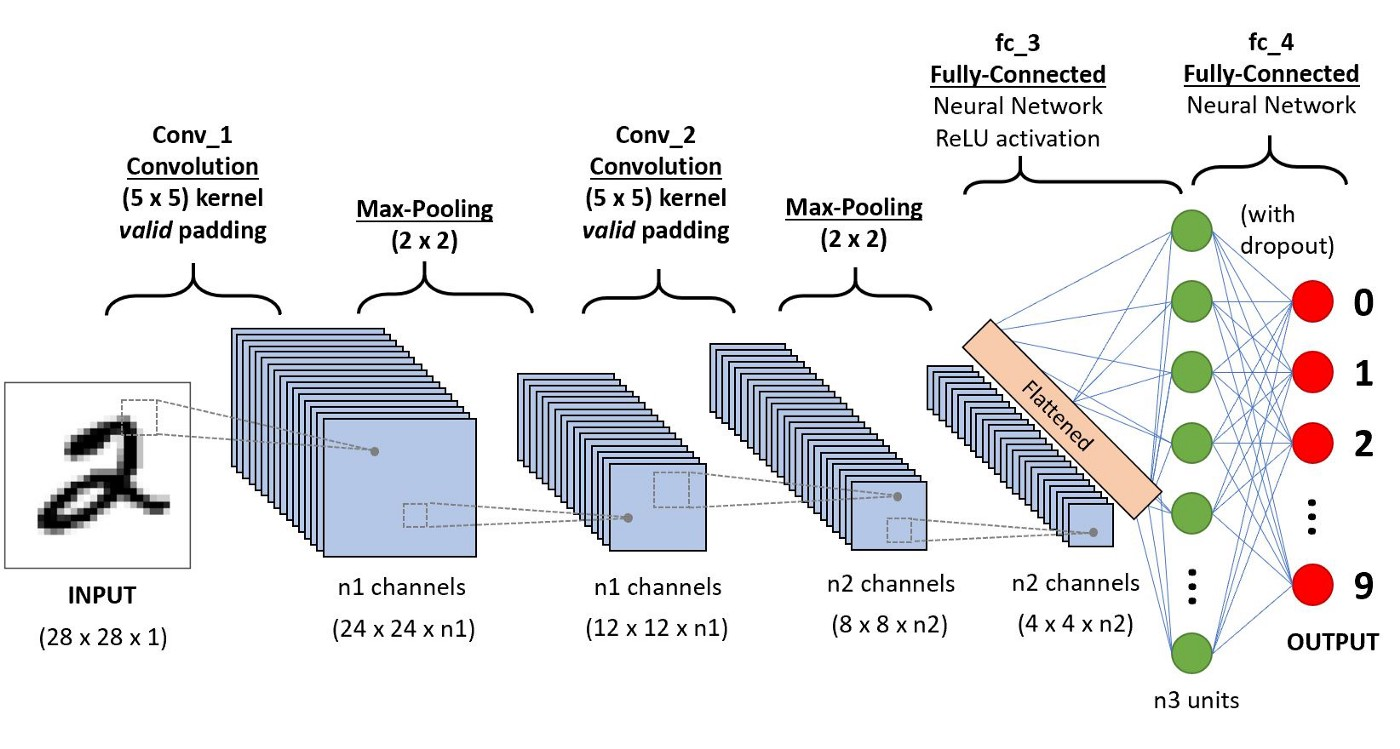

## **Flowers Classification**



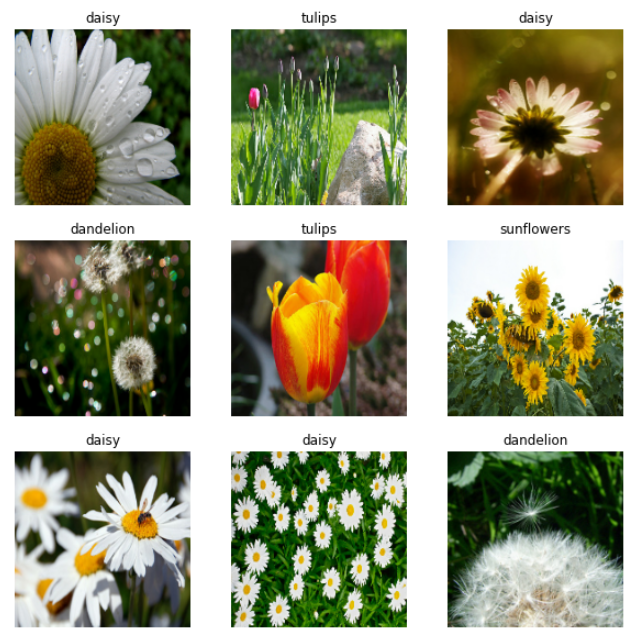

* Now, we build a Convolutional Neural Network to classify images of flowers

* We use a dataset that contains 3670 photos of flowers

* The dataset contains 5 sub-directories, one per class

In [1]:
import tensorflow as tf
import pathlib

import PIL
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

viene definita una variabile che contiene l'URL di un dataset di immagini di fiori, ospitato da Google. Il file è in formato .tgz, un file compresso che contiene diverse immagini.
*tf.kera.utils.get_files* : scarica il file dal percorso specificato in dataset_utl. Il primo argomento 'flowers_photo' è il nome che saraà assegnato alla cartella dove verranno estratti i file; 'origin=dataset_url', specifica l'url da cui scaricare il file; 'untar=True' indica che il file .tgz deve essere estratto automaticamente una volta scaricato. Dopo questa riga, il file scaricato ed estratto si troverà in una cartella locale, e il percorso completo di questa cartella sarà assegnato alla variabile data_dir.
data_dir, tramite pathlib.Path() coverte il percorso data_dir in un oggetto di tipo Path della libreria pathlib, utile per gestire dei file in modo flessibile e per accedere facilmente ai file all'interno della cartella.

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Conta e stampa il numero totale di immagini .jpg presente nel dataset di immagini di fiori. Viene utilizzato il metodo .glob() dell oggetto Path per cercare tutte le immagini con estensione .jpg nelle sottocartelle di data_dir (utilizza una specie di regex, */*.jpg indica che si cerca in tutte le sottocartelle di una data dir); questo viene fatto in list che converte l'ouput in una lista che contiene il percorso di ciascuna immagine .jpg, e tramite len viene calcolata la lunghezza della lista, quindi il numero totale di imamgini.

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


* The dataset contains photos of roses, tulips, daisy, dandelion and sunflowers

In [4]:
paths = list(data_dir.glob('*'))
paths

[PosixPath('/root/.keras/datasets/flower_photos/sunflowers'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion'),
 PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips'),
 PosixPath('/root/.keras/datasets/flower_photos/roses')]

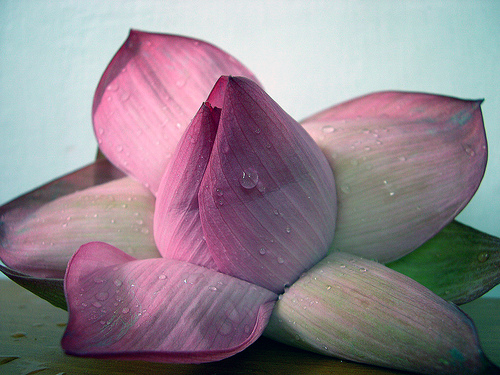

In [5]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

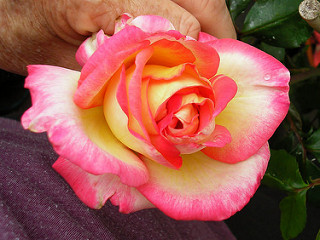

In [6]:
PIL.Image.open(str(roses[1]))

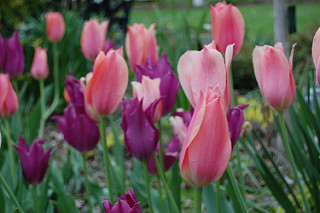

In [7]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

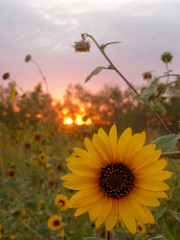

In [8]:
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[0]))

* Let's load these images off disk using *image_dataset_from_directory* utility

* This will take you from a directory of images on disk to a *tensorflow.data.Dataset*

* Now, we define some parameters for the loader

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split = 0.2, subset = 'training', seed = 42,
    image_size = (img_height, img_width), batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
train_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
val_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir, validation_split = 0.2, subset = 'validation', seed = 42,
  image_size = (img_height, img_width), batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [13]:
class_names = train_set.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

* We visualize the first 9 images from the training set

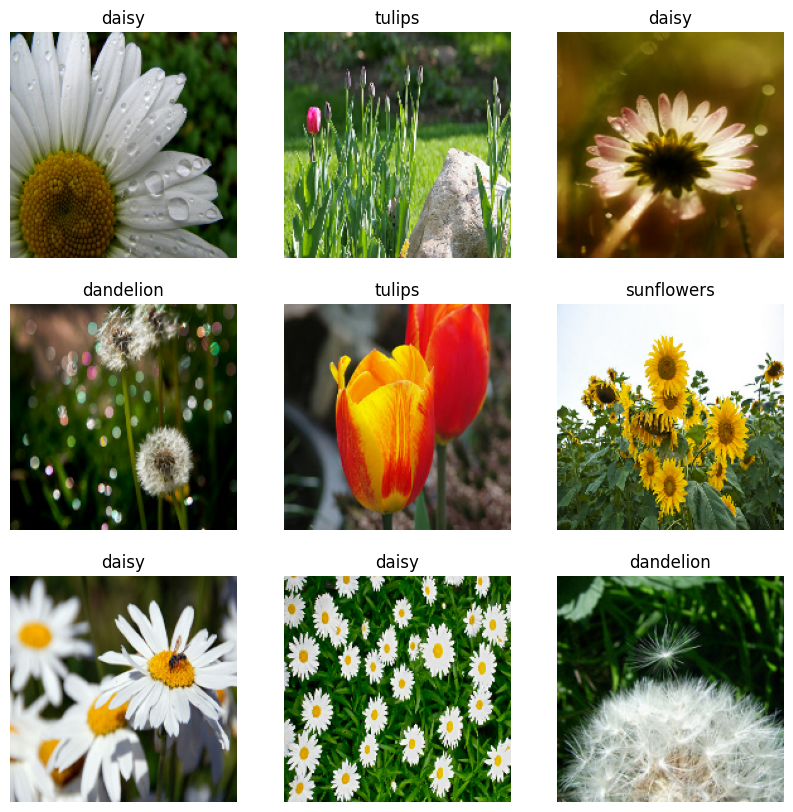

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [15]:
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


* We can see that the *image_batch* is a tensor of the shape (32, 180, 180, 3)

* This is a batch of 32 images of shape 180x180x3
  * The last dimension referes to color channels RGB

* The *label_batch* is a tensor of the shape (32,): these are corresponding labels to the 32 images

* The RGB channel values are in the [0, 255] range

* This is not ideal for a neural network

* We will standardize values to be in the [0, 1] range

In [16]:
import numpy as np

In [17]:
for image_batch, labels_batch in train_set:
  print('Min value: ', np.min(image_batch))
  print('Max value: ', np.max(image_batch))
  break

Min value:  0.0
Max value:  255.0


* We can use a Rescaling layer

In [18]:
norm_layer = layers.Rescaling(1. / 255.)

In [19]:
norm_train_set = train_set.map(lambda x, y: (norm_layer(x), y))

In [20]:
for image_batch, labels_batch in norm_train_set:
  print('Min value: ', np.min(image_batch))
  print('Max value: ', np.max(image_batch))
  break

Min value:  0.0
Max value:  1.0


* We can apply it to the dataset by calling map or

* We can include the layer inside our model definition

* Now, we can build the model

* In particular, the model consists of three convolution blocks with a max pool layer in each of them

In [21]:
num_classes = len(class_names)
num_classes

5

In [22]:
model = Sequential()
model.add(layers.Input(shape=(img_height, img_width, 3)))
model.add(layers.Rescaling(1. / 255.))
model.add(layers.Conv2D(32, (5, 5), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 176, 176, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 84, 84, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 128)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 258,624 (1010.25 KB)

 Trainable params: 258,624 (1010.25 KB)

 Non-trainable params: 0 (0.00 B)

* We can see that the output of every Conv2D and MaxPooling2D layers is a 3D tensor of shape (height, width, channels)

* The *height* and *width* dimension tend to shrink as we go deeper in the network

* The number of output channels for each Conv2D layer is controlled by the first argument

* The *channels* dimension tend to increase as we go deeper in the network

* To complete our model, we will feed the last output tensor into one or more Dense layers to perform classification

* The Dense layers take a 1D tensor as input, while the current output is a 3D tensor

* So, we will flatten the 3D output to 1D

* Then, add one or more Dense layers on top

* This dataset has 5 output classes, so we use a final Dense layer with 5 outputs and a softmax activation

In [24]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(num_classes, activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 176, 176, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 84, 84, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 46208)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,914,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,174,021 (23.55 MB)

 Trainable params: 6,174,021 (23.55 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [27]:
EPOCHS = 5
history = model.fit(train_set, validation_data = val_set,
                    epochs = EPOCHS)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 164ms/step - accuracy: 0.3551 - loss: 1.6451 - val_accuracy: 0.5531 - val_loss: 1.1439
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.5531 - loss: 1.0988 - val_accuracy: 0.5613 - val_loss: 1.0319
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.6277 - loss: 0.9609 - val_accuracy: 0.6458 - val_loss: 0.9886
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.7050 - loss: 0.7677 - val_accuracy: 0.6035 - val_loss: 1.1235
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7550 - loss: 0.6239 - val_accuracy: 0.6349 - val_loss: 1.0599


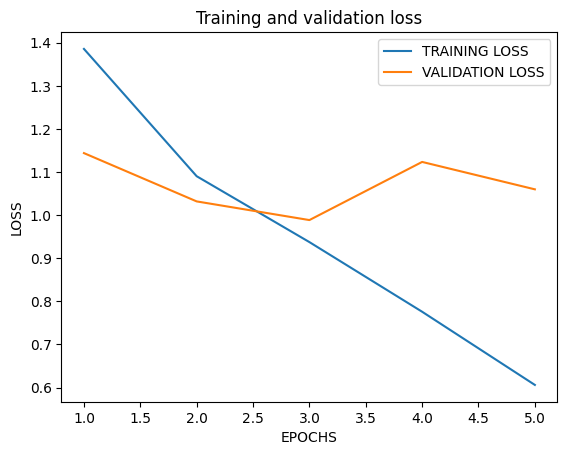

In [28]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label = 'TRAINING LOSS')
plt.plot(epochs, val_loss, label = 'VALIDATION LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.title('Training and validation loss')
plt.legend()

plt.show()

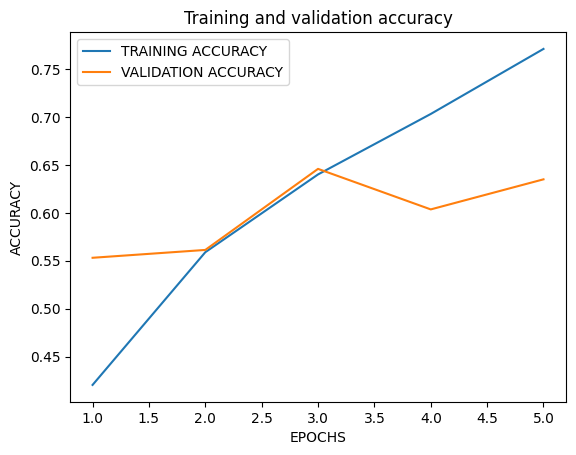

In [29]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, label='TRAINING ACCURACY')
plt.plot(epochs, val_acc, label = 'VALIDATION ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [30]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


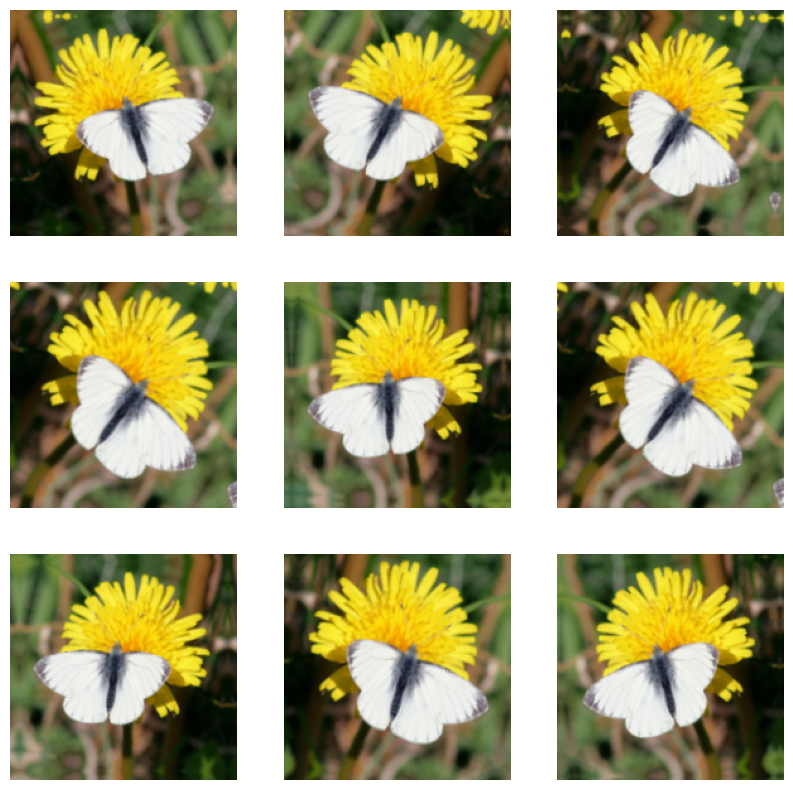

In [31]:
plt.figure(figsize=(10, 10))
for images, _ in train_set.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [32]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
epochs = 15
history = model.fit(
  train_set,
  validation_data=val_set,
  epochs=epochs
)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.3183 - loss: 1.5421 - val_accuracy: 0.5409 - val_loss: 1.1202
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.5701 - loss: 1.0673 - val_accuracy: 0.5967 - val_loss: 0.9816
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.6101 - loss: 0.9496 - val_accuracy: 0.6540 - val_loss: 0.9159
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.6311 - loss: 0.9076 - val_accuracy: 0.6853 - val_loss: 0.8243
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.6705 - loss: 0.8071 - val_accuracy: 0.6471 - val_loss: 0.8799
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.6882 - loss: 0.7885 - val_accuracy: 0.6853 - val_loss: 0.8271
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.7039 - loss: 0.7393 - val_accuracy: 0.6866 - val_loss: 0.8094
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.7219 - loss: 0.7191 - val_accuracy: 0.7016 

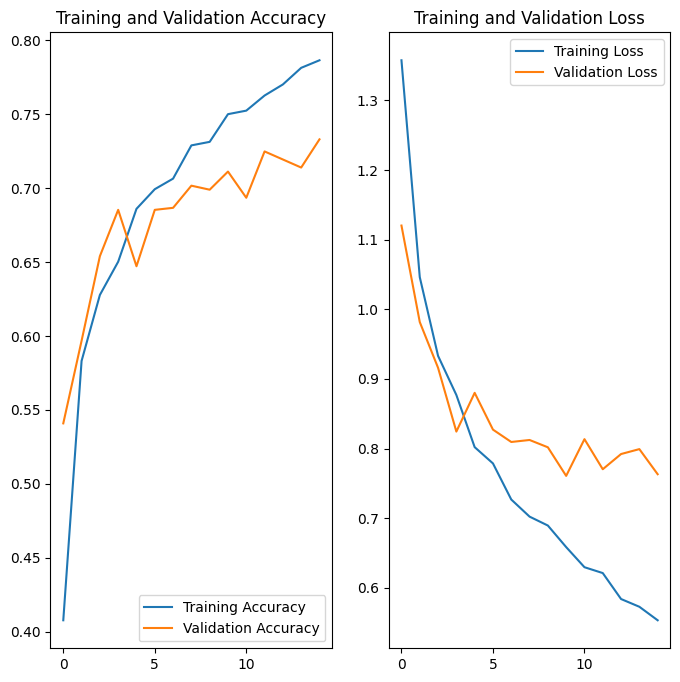

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
import numpy as np
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100*np.max(predictions))
)

117948/117948 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
This image most likely belongs to sunflowers with a 97.74 percent confidence.
